# Merge Dataframes

In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [4]:
#combining tech and data anlyst jobs to see how they compare 
#Merge pandas.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
# left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=None,
#  indicator=False, validate=None)

In [7]:
job_data = {
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Software Engineer', 'Product Manager', 'Marketing Director', 'HR Manager'],
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'job_location': ['Mountain View, CA', 'Redmond, WA', 'Cupertino, CA', 'Beaverton, OR', 'Seattle, WA']
}

company_data = {
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'industry': ['Technology', 'Technology', 'Technology', 'Apparel', 'Food & Beverage'],
    'company_size': ['100,000+', '100,000+', '100,000+', '75,000+', '346,000+']
}


df_jobs = pd.DataFrame(job_data)
df_companies = pd.DataFrame(company_data)

In [8]:
df_companies

,company_name,industry,company_size
0,Google,Technology,"100,000+"
1,Microsoft,Technology,"100,000+"
2,Apple,Technology,"100,000+"
3,Nike,Apparel,"75,000+"
4,Starbucks,Food & Beverage,"346,000+"


In [9]:
# Merge the two datasets on the 'job_id' column
df_job_company = df_jobs.merge(df_companies, on='company_name')

df_job_company

,job_id,job_title,company_name,job_location,industry,company_size
0,1,Data Scientist,Google,"Mountain View, CA",Technology,"100,000+"
1,2,Software Engineer,Microsoft,"Redmond, WA",Technology,"100,000+"
2,3,Product Manager,Apple,"Cupertino, CA",Technology,"100,000+"
3,4,Marketing Director,Nike,"Beaverton, OR",Apparel,"75,000+"
4,5,HR Manager,Starbucks,"Seattle, WA",Food & Beverage,"346,000+"


In [10]:
df_UK = df[df['job_country'] == 'United Kingdom'].copy()
df_UK['job_posted_month'] = df_UK['job_posted_date'].dt.strftime('%B')
df_UK_pivot = df_UK.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_UK_pivot = df_UK_pivot.reset_index()
df_UK_pivot['job_posted_month_no'] = pd.to_datetime(df_UK_pivot['job_posted_month'], format='%B').dt.month
df_UK_pivot = df_UK_pivot.sort_values('job_posted_month_no')
df_UK_pivot = df_UK_pivot.set_index('job_posted_month')
df_UK_pivot = df_UK_pivot.drop(columns='job_posted_month_no')


In [11]:
df_UK_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,46,3,1467,1253,1142,8,169,347,326,20
February,23,4,1051,1009,859,10,140,301,212,10
March,47,5,712,789,699,8,91,224,179,19
April,29,7,561,611,519,8,63,155,123,18
May,23,1,614,645,486,11,60,227,153,16
June,14,2,736,862,636,3,102,292,154,4
July,38,5,892,960,646,13,116,321,184,12
August,22,7,610,863,657,15,96,247,181,13
September,111,32,1112,1191,898,51,139,320,221,116


In [12]:
#we want to compare software development to data analytics 

In [13]:
import random

# Set seed for reproducibility
random.seed(42)

# Define job titles
job_titles = ['Front-End Developer', 'Back-End Developer', 'Full-Stack Developer', 'UI/UX Designer']

# Define months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Define ranges for random data
ranges = {
    'Front-End Developer': (1100, 1500),
    'Back-End Developer': (800, 1000),
    'Full-Stack Developer': (500, 750),
    'UI/UX Designer': (400, 500)
}

# Generate random data
data = {}
for job_title in job_titles:
    data[job_title] = [random.randint(ranges[job_title][0], ranges[job_title][1]) for _ in months]

# Create DataFrame
df_UK_software_pivot = pd.DataFrame(data, index=months)
df_UK_software_pivot.index.name = "job_posted_month"#job_posted_month shifted into the index

df_UK_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,1427,939,643,400
February,1157,822,550,497
March,1112,951,683,420
April,1479,908,666,489
May,1240,808,679,454
June,1225,807,639,443
July,1214,823,607,435
August,1171,855,556,419
September,1477,859,614,427


In [16]:
df_UK_merged = df_UK_pivot.merge(df_UK_software_pivot, on="job_posted_month") # defaults to inner join 
df_UK_merged

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,46,3,1467,1253,1142,8,169,347,326,20,1427,939,643,400
February,23,4,1051,1009,859,10,140,301,212,10,1157,822,550,497
March,47,5,712,789,699,8,91,224,179,19,1112,951,683,420
April,29,7,561,611,519,8,63,155,123,18,1479,908,666,489
May,23,1,614,645,486,11,60,227,153,16,1240,808,679,454
June,14,2,736,862,636,3,102,292,154,4,1225,807,639,443
July,38,5,892,960,646,13,116,321,184,12,1214,823,607,435
August,22,7,610,863,657,15,96,247,181,13,1171,855,556,419
September,111,32,1112,1191,898,51,139,320,221,116,1477,859,614,427


In [17]:
# find top 5 job titles (columns) in df_US_merged
top_5 = df_UK_merged.sum().sort_values(ascending=False).head(5).index

top_5 = top_5.tolist()

top_5

['Front-End Developer',
 'Data Engineer',
 'Data Analyst',
 'Back-End Developer',
 'Data Scientist']

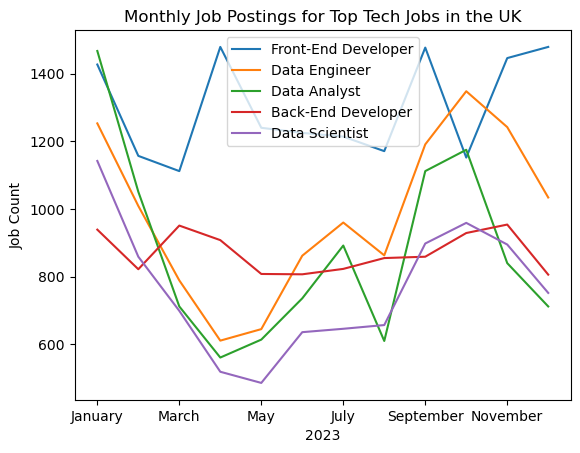

In [20]:
df_UK_merged[top_5].plot(kind='line')
plt.title('Monthly Job Postings for Top Tech Jobs in the UK')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()